UPLOADING THE DATASET "student mental health.csv"

In [ ]:
!pip install mysql-connector-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 33.0 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving student mental health.csv to student mental health (2).csv


LOADING THE DATASET ,DISPLAY TOP 5 ROWS

In [ ]:
import pandas as pd
df = pd.read_csv('student mental health.csv')
display(df.head())

,Name,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,Aarav,Male,15,Class 8,7.1,8.9,9.3,Medium,No,Same
1,Meera,Female,25,MSc,3.3,5.0,0.2,Medium,No,Same
2,Ishaan,Male,20,BTech,9.5,5.4,6.2,Medium,No,Same
3,Aditya,Male,20,BA,10.8,5.6,5.5,High,Yes,Same
4,Anika,Female,17,Class 11,2.8,5.4,3.1,Medium,Yes,Same


EXPLORING THE DATASET STRUCTURE, DATA TYPES, DESCRIPTIVE STATISTICS, UNIQUE VALUES IN KEY COLUMN, AND MISSING VALUES

In [ ]:

print(df.shape)

print(df.dtypes)

print(df.describe())
#for number of unique values of each column
for col in ['Gender', 'Age', 'Education Level', 'Stress Level', 'Anxious Before Exams', 'Academic Performance Change']:
    print(df[col].unique())

print(df.isnull().sum())


(1000, 10)
Name                             object
Gender                           object
Age                               int64
Education Level                  object
Screen Time (hrs/day)           float64
Sleep Duration (hrs)            float64
Physical Activity (hrs/week)    float64
Stress Level                     object
Anxious Before Exams             object
Academic Performance Change      object
dtype: object
               Age  Screen Time (hrs/day)  Sleep Duration (hrs)  \
count  1000.000000            1000.000000           1000.000000   
mean     20.342000               6.909200              6.450800   
std       3.459914               2.907106              1.466407   
min      15.000000               2.000000              4.000000   
25%      17.000000               4.400000              5.100000   
50%      20.000000               6.900000              6.500000   
75%      23.000000               9.500000              7.700000   
max      26.000000              12.0000

DATA HAS NO MISSING VALUE, NO CLEANING REQUIRED

CALCULATING THE CORRELATION MATRIX AND PLOTS

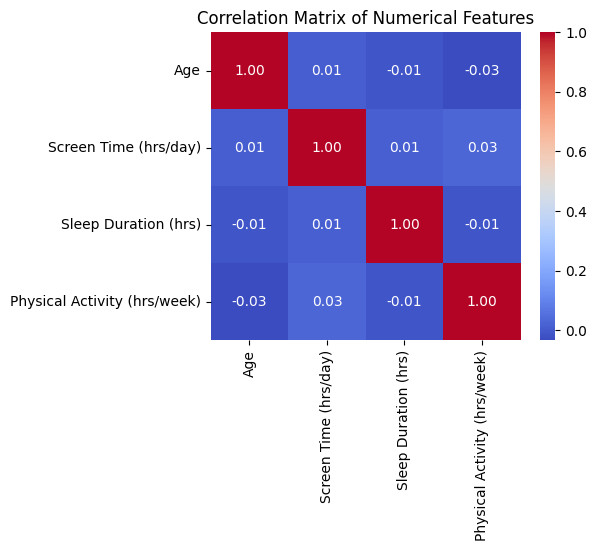


Analysis of 'Age' column:
Mean: 20.342
Median: 20.0
Standard Deviation: 3.459914306309771

Analysis of 'Stress Level' column:
Stress Level
Medium    492
Low       327
High      181
Name: count, dtype: int64

Analysis of 'Anxious Before Exams' column:
Anxious Before Exams
Yes    513
No     487
Name: count, dtype: int64

Analysis of 'Academic Performance Change' column:
Academic Performance Change
Same        399
Improved    303
Declined    298
Name: count, dtype: int64

Stress level by education level:


Education Level  Stress Level
BA               Medium          32
                 High            17
                 Low             13
BSc              Medium          43
                 Low             28
                 High            14
BTech            Medium          37
                 Low             26
                 High            21
Class 10         Medium          43
                 Low             30
                 High            14
Class 11         Medium          46
                 Low             26
                 High            16
Class 12         Medium          20
                 Low             19
                 High             8
Class 8          Medium          27
                 Low             14
                 High             9
Class 9          Medium          39
                 Low             36
                 High            12
MA               Medium          55
                 Low             51
                 High            23
MSc              Medium          67
                 Low             45
                 High            26
MTech            Medium          83
                 Low             39
                 High            21
Name: count, dtype: int64


Stress level by gender:


Gender  Stress Level
Female  Medium          233
        Low             157
        High             85
Male    Medium          239
        Low             155
        High             81
Other   Medium           20
        High             15
        Low              15
Name: count, dtype: int64

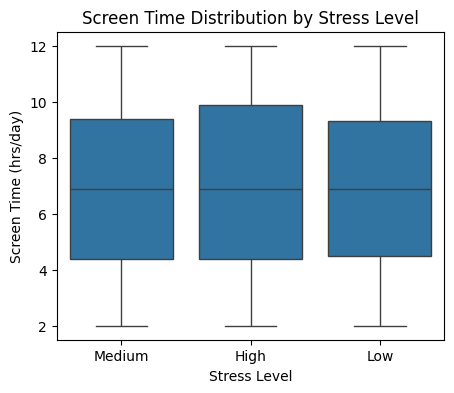

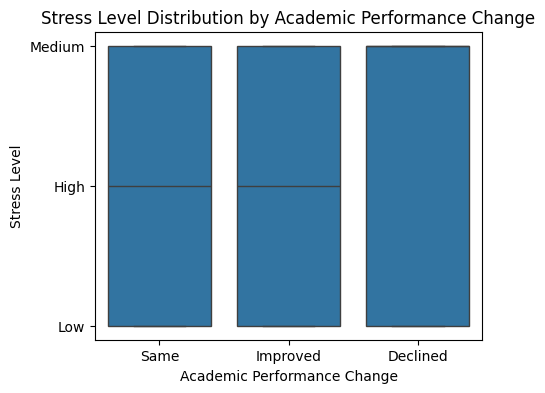

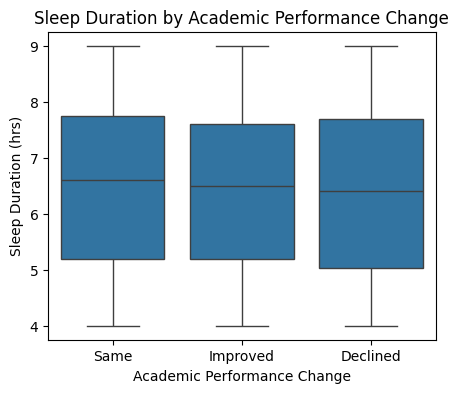

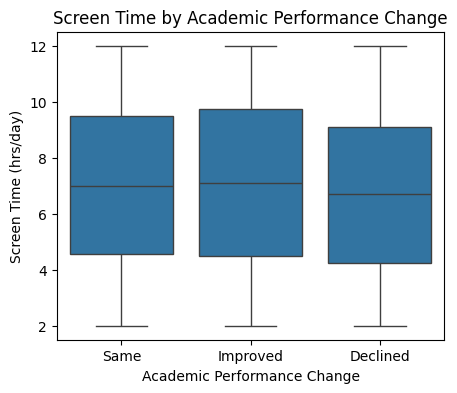

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#calculating correlation
numerical_features = ['Age', 'Screen Time (hrs/day)', 'Sleep Duration (hrs)', 'Physical Activity (hrs/week)']
correlation_matrix = df[numerical_features].corr()
#heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

for col in ['Age', 'Stress Level', 'Anxious Before Exams', 'Academic Performance Change']:
    print(f"\nAnalysis of '{col}' column:")
    if pd.api.types.is_numeric_dtype(df[col]):
        print(f"Mean: {df[col].mean()}")
        print(f"Median: {df[col].median()}")
        print(f"Standard Deviation: {df[col].std()}")
    else:
        print(df[col].value_counts())

# stress level for each education level
print("\nStress level by education level:")
display(df.groupby('Education Level')['Stress Level'].value_counts())
#stress level for each gender
print("\nStress level by gender:")
display(df.groupby('Gender')['Stress Level'].value_counts())
#plotting
plt.figure(figsize=(5, 4))
sns.boxplot(x='Stress Level', y='Screen Time (hrs/day)', data=df)
plt.title('Screen Time Distribution by Stress Level')
plt.show()

plt.figure(figsize=(5, 4))
sns.boxplot(x='Academic Performance Change', y='Stress Level', data=df)
plt.title('Stress Level Distribution by Academic Performance Change')
plt.show()

plt.figure(figsize=(5,4))
sns.boxplot(x='Academic Performance Change', y='Sleep Duration (hrs)', data=df)
plt.title('Sleep Duration by Academic Performance Change')
plt.show()

plt.figure(figsize=(5,4))
sns.boxplot(x='Academic Performance Change', y='Screen Time (hrs/day)', data=df)
plt.title('Screen Time by Academic Performance Change')
plt.show()


DATA VISUALIZATION

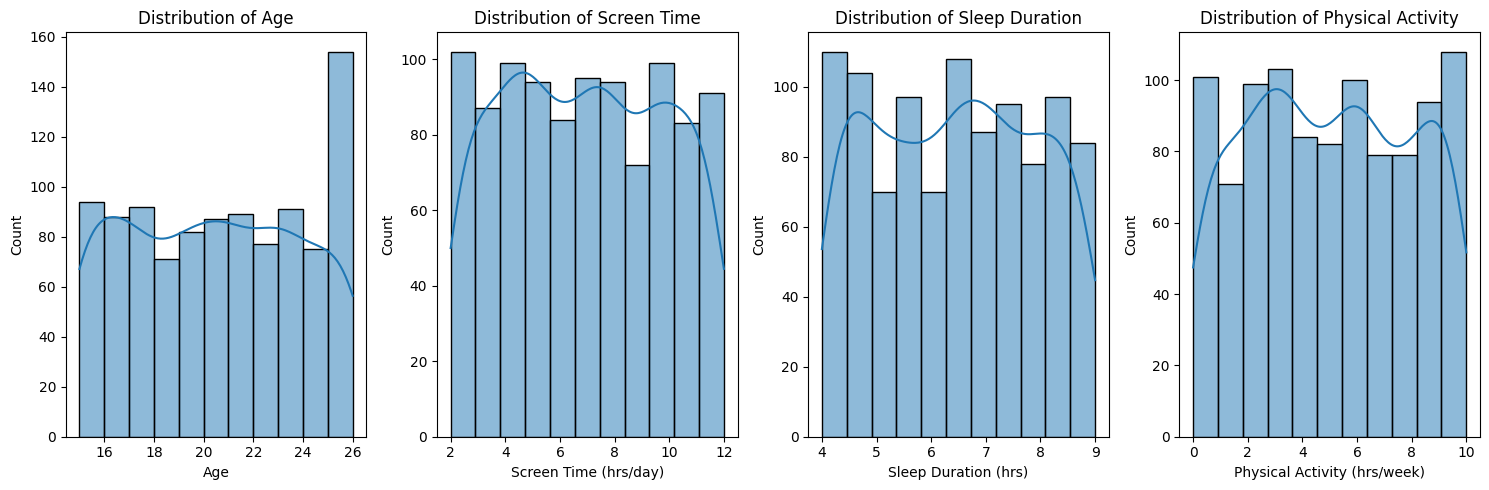

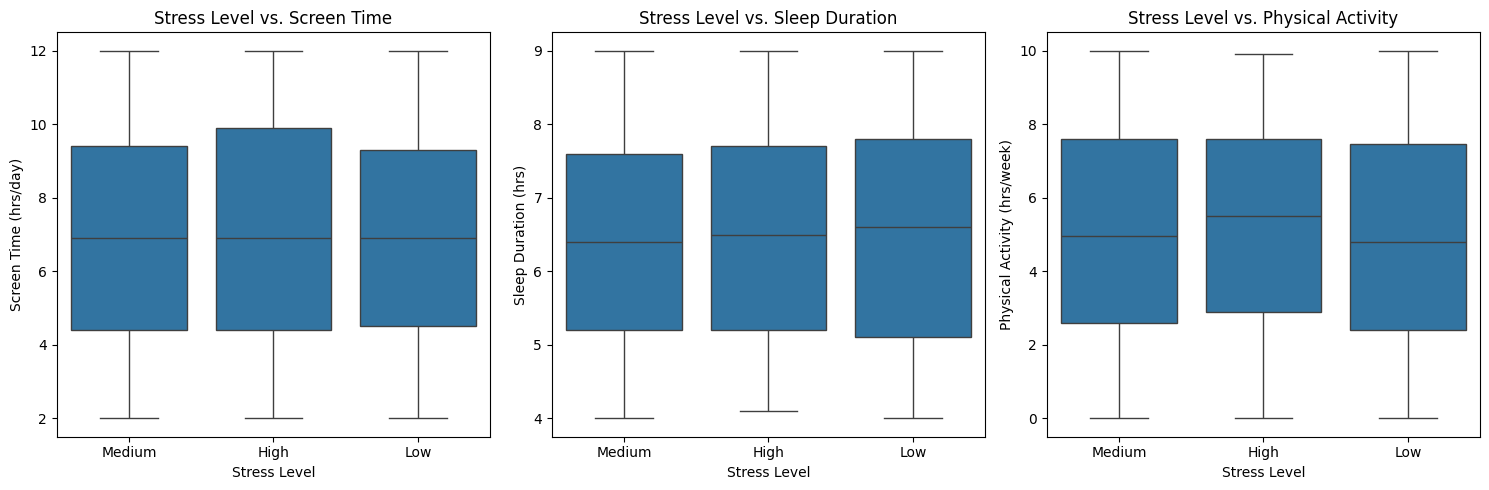

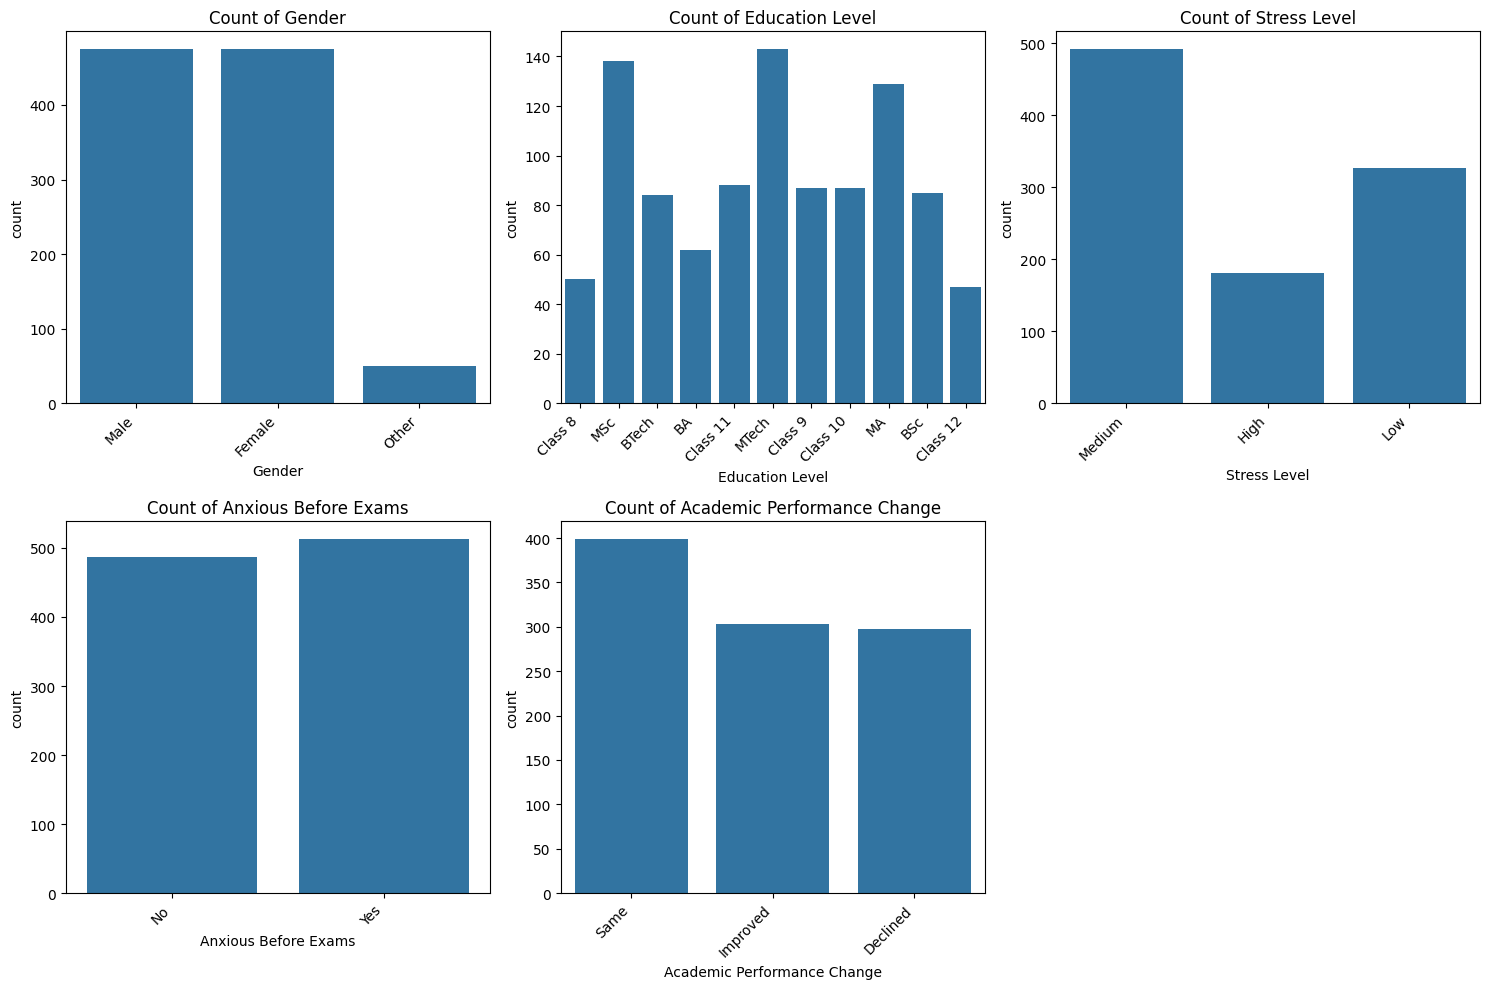

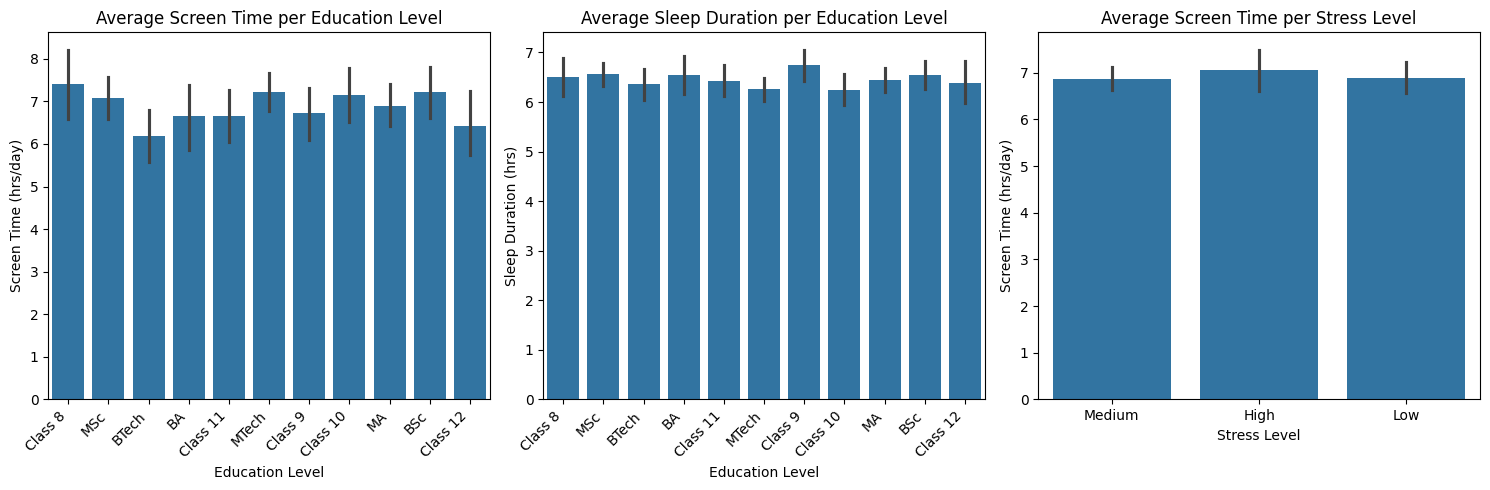

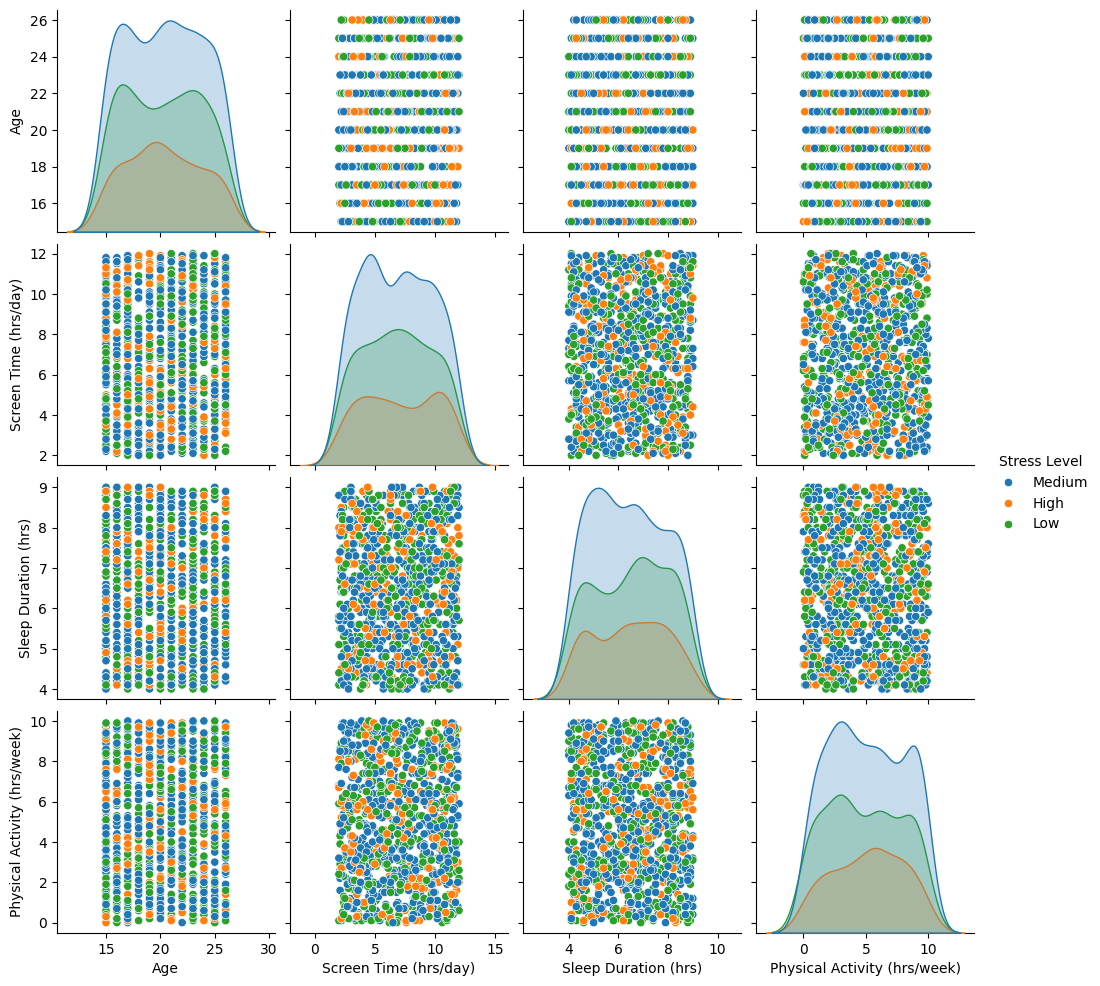

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograms for numerical variables
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 4, 2)
sns.histplot(df['Screen Time (hrs/day)'], kde=True)
plt.title('Distribution of Screen Time')

plt.subplot(1, 4, 3)
sns.histplot(df['Sleep Duration (hrs)'], kde=True)
plt.title('Distribution of Sleep Duration')

plt.subplot(1, 4, 4)
sns.histplot(df['Physical Activity (hrs/week)'], kde=True)
plt.title('Distribution of Physical Activity')
plt.tight_layout()
plt.show()


# 2. Box plot for 'Stress Level' v/s other variables
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Stress Level', y='Screen Time (hrs/day)', data=df)
plt.title('Stress Level vs. Screen Time')

plt.subplot(1, 3, 2)
sns.boxplot(x='Stress Level', y='Sleep Duration (hrs)', data=df)
plt.title('Stress Level vs. Sleep Duration')

plt.subplot(1, 3, 3)
sns.boxplot(x='Stress Level', y='Physical Activity (hrs/week)', data=df)
plt.title('Stress Level vs. Physical Activity')
plt.tight_layout()
plt.show()


# 3. Count plot for categorical variables
categorical_features = ['Gender', 'Education Level', 'Stress Level', 'Anxious Before Exams', 'Academic Performance Change']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, data=df)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# 4. Bar charts
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x='Education Level', y='Screen Time (hrs/day)', data=df)
plt.title('Average Screen Time per Education Level')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
sns.barplot(x='Education Level', y='Sleep Duration (hrs)', data=df)
plt.title('Average Sleep Duration per Education Level')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
sns.barplot(x='Stress Level', y='Screen Time (hrs/day)', data=df)
plt.title('Average Screen Time per Stress Level')
plt.tight_layout()
plt.show()

# 5. Scatterplot
sns.pairplot(df, hue='Stress Level', vars=['Age', 'Screen Time (hrs/day)', 'Sleep Duration (hrs)', 'Physical Activity (hrs/week)'])
plt.show()

In [ ]:
# Save cleaned data
df.to_csv("cleaned_student_data.csv", index=False)




---


